## Visualization of the extrapolation experiments resuts

In [1]:
from scipy.io import loadmat, whosmat
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

from src import states, reports

import os
import sys

sys.path.append('..')

## Performance metrics for the initial guess models on the Egg dataset

#### Extracting main experiment performance data from the `.mat`-files. Grouping it into the table with index:
- `realization` - number of realization of the main experiment
- `ndiff` - length of the real-time training dataset
- `timestep` -  single simulation timestep

In [2]:
n_realizations = 101
n_diffs = 5
n_timesteps = 120

realizations = list(range(0, n_realizations))
diffs = list(range(0, n_diffs))
timesteps = list(range(0, n_timesteps))

scenarios = pd.MultiIndex.from_product([realizations, diffs, timesteps], names=["realization", "ndiff", "timestep"])

df = pd.DataFrame(data = {"iters": np.zeros(len(scenarios), dtype=np.int8),
                          "time": np.zeros(len(scenarios))}, index = scenarios)

for i in realizations:
    for j in diffs:
        report_name = ''.join(['report_', str(i), '_', str(j)])
        report_path = os.path.join('./results/main', report_name)
        report = reports(report_path)
        df.loc[(i, j), "iters"] = report[0]
        df.loc[(i, j), "time"] = report[1]

In [3]:
grouped = df.groupby(["ndiff", "realization"])

In [4]:
df_sum = grouped.aggregate(np.sum)

In [5]:
sum_grouped = df_sum.groupby("ndiff")

In [6]:
sum_grouped.describe()

iters                                                             time  \
       count        mean        std    min    25%    50%    75%    max  count   
ndiff                                                                           
0      101.0  387.584158  11.911564  363.0  379.0  386.0  395.0  419.0  101.0   
1      101.0  326.287129  12.809634  302.0  317.0  325.0  334.0  360.0  101.0   
2      101.0  307.831683  15.165797  279.0  296.0  306.0  318.0  353.0  101.0   
3      101.0  305.841584  13.433341  275.0  296.0  304.0  314.0  342.0  101.0   
4      101.0  301.158416  14.194881  265.0  290.0  299.0  310.0  338.0  101.0   

                                                                             \
             mean       std         min         25%         50%         75%   
ndiff                                                                         
0      155.226914  5.018884  145.716010  151.189517  154.945900  157.942353   
1      132.537150  4.985319  123.240784  128.922350  132.080041  135.713345   
2      126.768101  5.600907  117.769129  122.874985  125.775646  129.673063   
3      128.843925  5.070460  119.049111  125.288735  127.794565  131.350594   
4      126.799610  5.225669  115.448386  122.618924  125.401800  130.881886   

                   
              max  
ndiff              
0      169.530042  
1      144.951811  
2      144.829972  
3      145.497846  
4      143.924556

In [7]:
df_rel_iters = pd.DataFrame({ndiff: (df_sum.loc[0, "iters"]  / df_sum.loc[ndiff, "iters"]).values for ndiff in range(5)})

In [8]:
df_rel_iters.describe().T

,count,mean,std,min,25%,50%,75%,max
0,101.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,101.0,1.188528,0.027624,1.115493,1.167702,1.188791,1.209877,1.247619
2,101.0,1.260479,0.035548,1.164306,1.237785,1.258389,1.281879,1.332180
3,101.0,1.268193,0.028285,1.198830,1.249169,1.265306,1.289308,1.332180
4,101.0,1.288135,0.030058,1.213018,1.268293,1.287129,1.309609,1.369811


In [9]:
df_rel_time = pd.DataFrame({ndiff: (df_sum.loc[0, "time"]  / df_sum.loc[ndiff, "time"]).values for ndiff in range(5)})

In [10]:
df_rel_time.describe().T

,count,mean,std,min,25%,50%,75%,max
0,101.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,101.0,1.171769,0.029023,1.092674,1.155415,1.170621,1.190622,1.251177
2,101.0,1.225559,0.036164,1.126919,1.204119,1.227040,1.250445,1.321152
3,101.0,1.205531,0.033718,1.121747,1.188072,1.209994,1.227125,1.275336
4,101.0,1.225061,0.034371,1.128649,1.205392,1.226200,1.242947,1.324646


In [33]:
stats.ttest_rel(df_rel_iters.loc[:, 1], df_rel_iters.loc[:, 2])

Ttest_relResult(statistic=-21.5331070765497, pvalue=2.459921264257546e-39)

In [34]:
stats.ttest_rel(df_rel_iters.loc[:, 2], df_rel_iters.loc[:, 3])

Ttest_relResult(statistic=-3.1255626520391813, pvalue=0.0023232794946204663)

In [35]:
stats.ttest_rel(df_rel_iters.loc[:, 3], df_rel_iters.loc[:, 4])

Ttest_relResult(statistic=-9.797268091289085, pvalue=2.7556785685927445e-16)

In [36]:
stats.ttest_rel(df_rel_time.loc[:, 1], df_rel_time.loc[:, 2])

Ttest_relResult(statistic=-15.963162210536508, pvalue=2.9547793908647085e-29)

In [37]:
stats.ttest_rel(df_rel_time.loc[:, 2], df_rel_time.loc[:, 3])

Ttest_relResult(statistic=6.898073173771872, pvalue=4.855470500288614e-10)

In [38]:
stats.ttest_rel(df_rel_time.loc[:, 3], df_rel_time.loc[:, 4])

Ttest_relResult(statistic=-7.8150747962659874, pvalue=5.665768904702558e-12)

In [22]:
G = df.groupby("ndiff")

In [12]:
rel_counts_extrapolate = df_rel_iters.loc[:, 1].values
rel_counts_regression = df_rel_iters.loc[:, 2].values

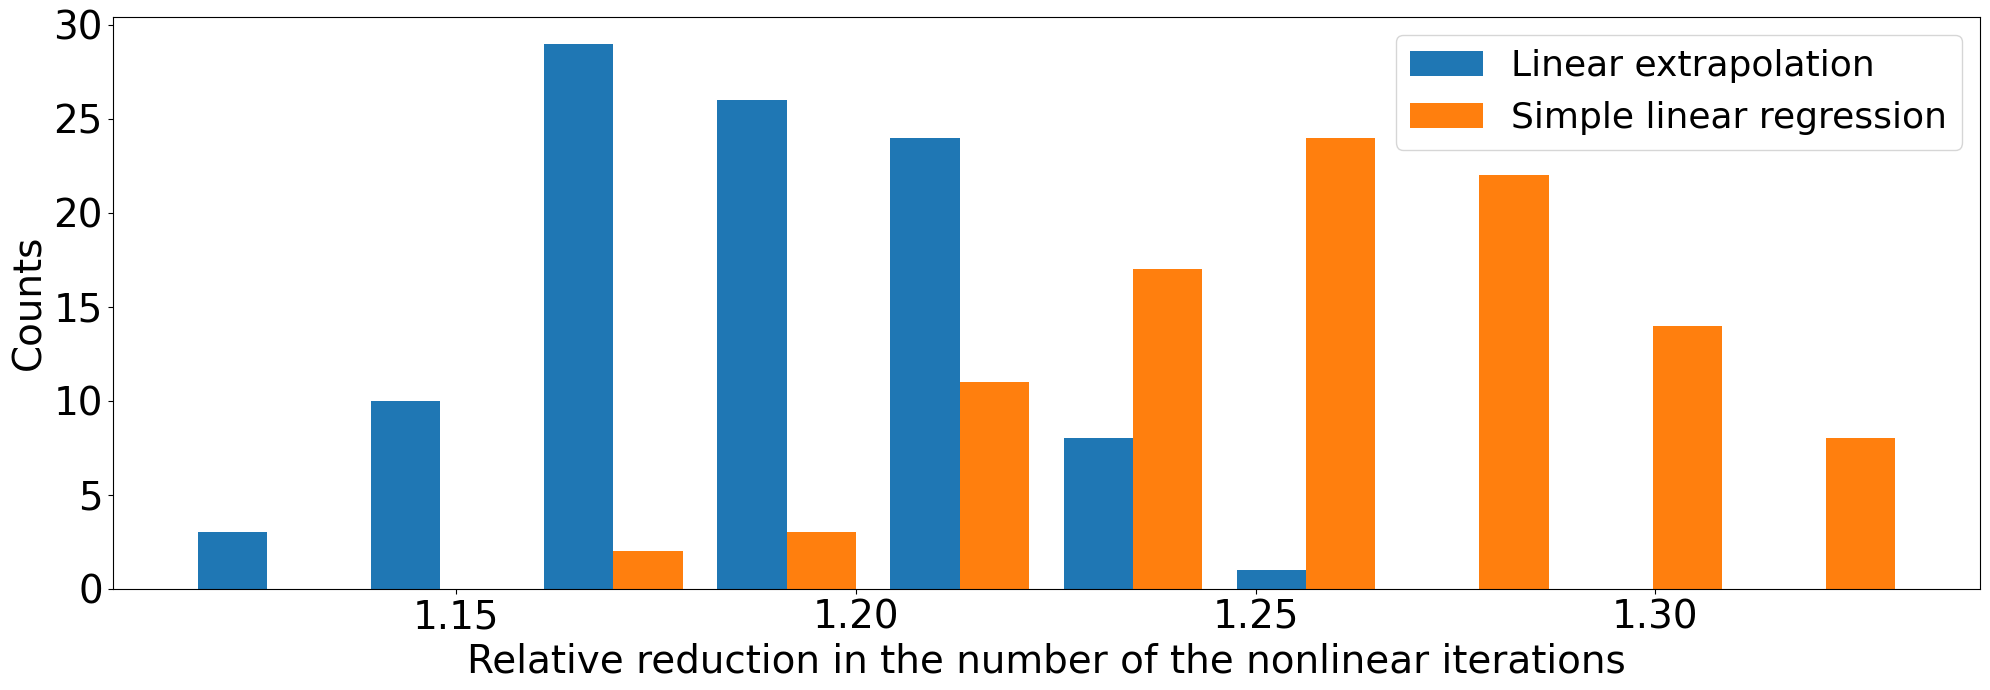

In [16]:
n_bins = 10

fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize = (20, 7))

# We can set the number of bins with the *bins* keyword argument.
ax.hist([rel_counts_extrapolate, rel_counts_regression], bins=n_bins);
ax.set_xlabel('Relative reduction in the number of the nonlinear iterations', fontsize=28)
ax.set_ylabel('Counts', fontsize=28)
plt.setp(ax.get_xticklabels(), fontsize = 28)
plt.setp(ax.get_yticklabels(), fontsize = 28)

ax.legend(['Linear extrapolation', 'Simple linear regression'], fontsize=26)
plt.savefig("./results/histogram.pdf", format="pdf", bbox_inches = 'tight')

## A test case with abrupt changes

In [3]:
vanilla_case = reports('./results/main/report_0_0.mat')
const_extr = reports('./results/abrupt/abrupt_report_0_0.mat')
lin_extr = reports('./results/abrupt/abrupt_report_0_1.mat')
regr_extr = reports('./results/abrupt/abrupt_report_0_2.mat')
three_diff_regr_extr = reports('./results/abrupt/abrupt_report_0_3.mat')

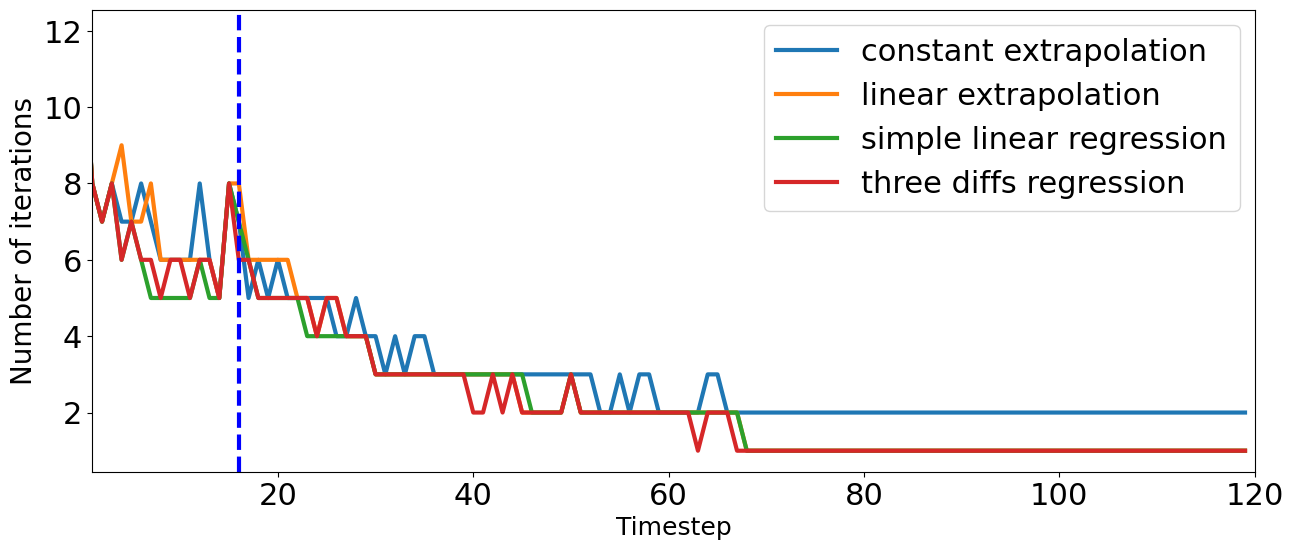

In [7]:
plt.subplots(figsize=(15, 6))

plt.xlabel('Timestep', fontsize=18)
plt.ylabel('Number of iterations', fontsize=20)
plt.xlim(1, 120)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

plt.plot(const_extr[0], linewidth=3.0, label = "constant extrapolation")
plt.plot(lin_extr[0],   linewidth=3.0, label = "linear extrapolation")
plt.plot(regr_extr[0],  linewidth=3.0, label = "simple linear regression")
plt.plot(three_diff_regr_extr[0],  linewidth=3.0, label = "three diffs regression")
plt.axvline(x = 16, linewidth=3.0, linestyle='--', color='b')

plt.legend(fontsize=22)
plt.savefig("./results/abrupt_changes.pdf", format="pdf", bbox_inches = 'tight')

## Coefficients dynamics

In [8]:
!pip install latex

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7588 sha256=4c6cac16504885b6b7b188f09c21f6a16641ac9d8471f4fa939bac0953a1f083
  Stored in directory: /home/m.petrosyants/.cache/pip/wheels/94/84/e5/5ce582523fd479d00356867953085a67c47fbbc86506aa92f8
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7227 sha256=c1679122c0c37a11961693eb57203f8104aa87e9a980be6e270a3ada3178c032
  Stored in directory: /home/m.petrosyants/.cache/pip/wheels/8a/0b/a3/37ca07d5a2838bba2e475e8090455e40b94631bd57a99a35f4
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2767 sha256=29b1881e5aa11285c635cb02e07d723ce1f026b971195dc0f88269694c522107
  Stored in directory: /home/m.petrosyants/.cache/pip/wheels/84/c7/f5/fed66dce1ed897b44e0da776b6a592dfad0a70f7dd61f73a9d
  Created wheel for temp

In [2]:
mat_contents = loadmat('./results/coeffs/coeffs_0_2.mat', squeeze_me=True)

In [3]:
coeffs_report = mat_contents['coeffs']

In [4]:
coeffs_pressure = coeffs_report['coeffs_pressure']
coeffs_wat_sat = coeffs_report['coeffs_wat_sat']

coeffs_pressure = np.array(coeffs_pressure[1:], dtype=np.float32)
coeffs_wat_sat = np.array(coeffs_wat_sat[1:], dtype=np.float32)

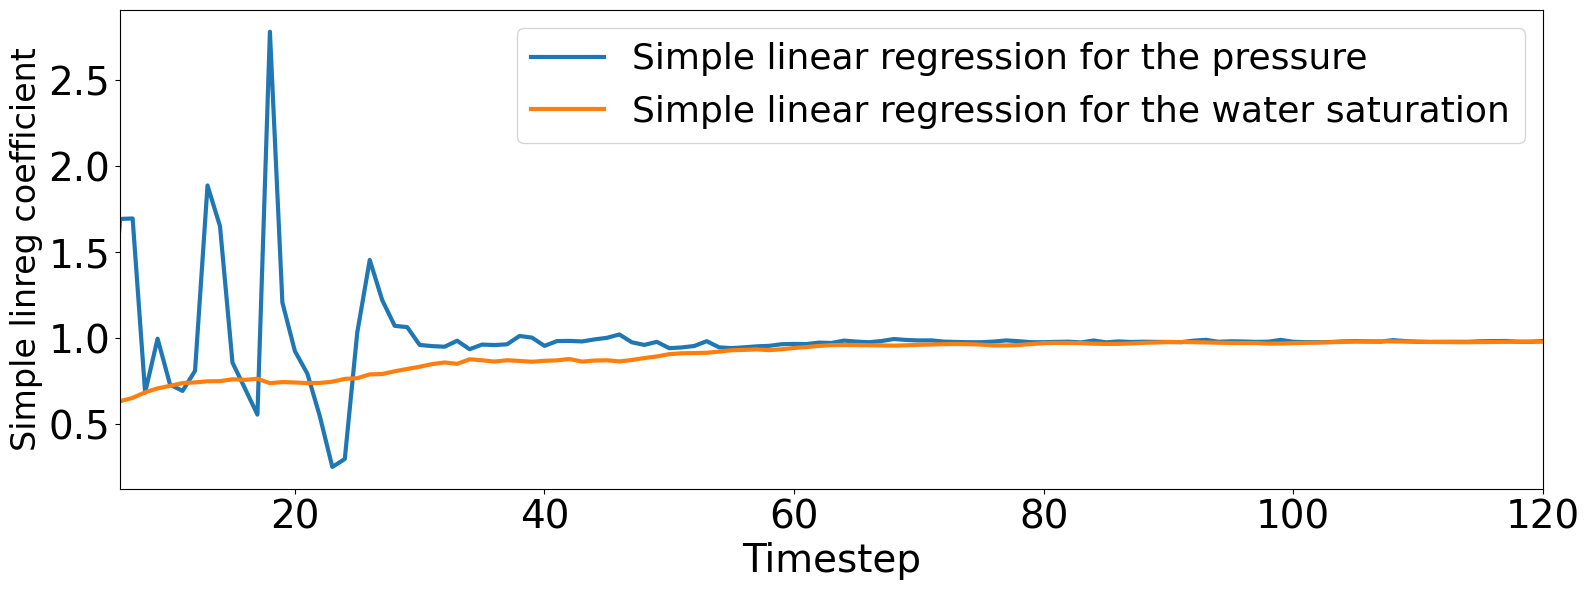

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))

#ax.set_title('Linear regression coefficient change', fontsize=28)
ax.set_xlabel('Timestep', fontsize=28)
ax.set_xlim(6, 120)
#ax.set_ylim(0, 330)
ax.set_ylabel('Simple linreg coefficient', fontsize = 24)
plt.setp(ax.get_xticklabels(), fontsize = 28)
plt.setp(ax.get_yticklabels(), fontsize = 28)

timeline = np.arange(5, 121)

ax.plot(timeline, coeffs_pressure, linewidth=3.0)
ax.plot(timeline, coeffs_wat_sat, linewidth=3.0)

ax.legend(['Simple linear regression for the pressure', 'Simple linear regression for the water saturation'], fontsize=26)

fig.tight_layout()

plt.savefig("./results/coeffs.pdf", format="pdf", bbox_inches = 'tight')

In [20]:
mat_contents = loadmat('./results/coeffs/coeffs_0_4.mat', squeeze_me=True)

In [21]:
coeffs_report = mat_contents['coeffs']

In [22]:
coeffs_pressure = coeffs_report['coeffs_pressure']
coeffs_wat_sat = coeffs_report['coeffs_wat_sat']

In [23]:
coeffs_pressure[-1]

array([ 1.41239384, -3.06777224,  2.64487134])

In [24]:
coeffs_wat_sat[-1]

array([ 0.69273016, -2.34550128,  2.65133401])